In [24]:
import pandas as pd
import json

df = pd.read_csv("data/0721-month-analysis-data.csv")
analyzed_homepages = pd.read_json("homepage_data_analyzed_multiple_joined_20.json", encoding='utf-8')


In [25]:
computed_columns = ['general_analysis', 'cross_group_thinking_ideas',
       'cross_group_thinking_score', 'unifying_language_ideas',
       'unifying_language_score', 'shared_initiatives_outreach_ideas',
       'shared_initiatives_outreach_score', 'importance_of_career_standing_ideas', 'importance_of_career_standing_score', 
       'hong_kong_emphasis_ideas', 'hong_kong_emphasis_score', 'highlighting_china_organization_ideas',
       'highlighting_china_organization_score']

In [26]:
standard_columns = computed_columns + ['name']

standard_columns = [col for col in analyzed_homepages.columns if any(col.startswith(prefix) for prefix in standard_columns)]

analyzed_homepages = analyzed_homepages[standard_columns]

In [27]:
analyzed_homepages.columns

Index(['general_analysis_gpt-4o_0_0',
       'cross_group_thinking_ideas_analysis_gpt-4o_0_0',
       'cross_group_thinking_score_gpt-4o_0_0',
       'unifying_language_ideas_analysis_gpt-4o_0_0',
       'unifying_language_score_gpt-4o_0_0',
       'shared_initiatives_outreach_ideas_analysis_gpt-4o_0_0',
       'shared_initiatives_outreach_score_gpt-4o_0_0',
       'importance_of_career_standing_ideas_analysis_gpt-4o_0_0',
       'importance_of_career_standing_score_gpt-4o_0_0',
       'hong_kong_emphasis_ideas_analysis_gpt-4o_0_0',
       ...
       'unifying_language_score_gpt-4o_4_3',
       'shared_initiatives_outreach_ideas_analysis_gpt-4o_4_3',
       'shared_initiatives_outreach_score_gpt-4o_4_3',
       'importance_of_career_standing_ideas_analysis_gpt-4o_4_3',
       'importance_of_career_standing_score_gpt-4o_4_3',
       'hong_kong_emphasis_ideas_analysis_gpt-4o_4_3',
       'hong_kong_emphasis_score_gpt-4o_4_3',
       'highlighting_china_organization_ideas_analysis_gpt-4o_

In [28]:
score_prefixes = ['cross_group_thinking', 'unifying_language', 'shared_initiatives_outreach', 'importance_of_career_standing', 'hong_kong_emphasis', 'highlighting_china_organization']

for prefix in score_prefixes:
    score_columns = [col for col in analyzed_homepages.columns if col.startswith(prefix + '_score')]
    for column in score_columns:
        analyzed_homepages[column] = pd.to_numeric(analyzed_homepages[column], errors='coerce').fillna(0).astype(int)

hk_columns = [col for col in analyzed_homepages.columns if col.startswith('hong_kong_emphasis_score')]
for col in hk_columns:
    analyzed_homepages["inverse_" + col] = pd.to_numeric(analyzed_homepages[col], errors='coerce').fillna(0).astype(int)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_53242/2763243756.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages["inverse_" + col] = pd.to_numeric(analyzed_homepages[col], errors='coerce').fillna(0).astype(int)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_53242/2763243756.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages["inverse_" + col] = pd.to_numeric(analyzed_homepages[col], errors='coerce').fillna(0).astype(int)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w00

In [29]:
pooled_scores = {
    "total_reconciliation_score": [col for col in analyzed_homepages.columns if any(prefix in col for prefix in ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score'])],
    "total_camouflage_score": [col for col in analyzed_homepages.columns if any(prefix in col for prefix in ['importance_of_career_standing_score', 'inverse_hong_kong_emphasis_score', 'highlighting_china_organization_score'])]
}



for key, columns_to_convert in pooled_scores.items():
    analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_53242/105256012.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_53242/105256012.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)


In [30]:
merged_df = pd.merge(df, analyzed_homepages, left_on='Researcher Cleaned Name', right_on='name', how='left')
# merged_df.fillna(0, inplace=True)
merged_df.drop(columns=['name'], inplace=True)

print(merged_df['Pre-2014 Region'].value_counts())

merged_df = merged_df[[col for col in merged_df.columns if not any(prefix in col for prefix in computed_columns)]]

merged_df.to_csv("data/0721-month-analysis-data-merged-joined-20.csv", index=False)

Pre-2014 Region
Hong Kong    21848
Singapore    15125
Name: count, dtype: int64


In [31]:
merged_df.columns

Index(['Researcher Cleaned Name', 'year', 'month', 'num_sg_mean',
       'num_sg_error', 'num_hk_mean', 'num_hk_error', 'num_ml_mean',
       'num_ml_error', 'num_other_mean', 'num_other_error', 'teamsize_mean',
       'teamsize_error', 'prop_sg_mean', 'prop_sg_error', 'prop_hk_mean',
       'prop_hk_error', 'prop_ml_mean', 'prop_ml_error', 'prop_other_mean',
       'prop_other_error', 'total_citations_mean', 'total_citations_error',
       'Name', 'Researcher Classification', 'Left after 2014', 'PhD Location',
       'Master Location', 'Bachelor Location', 'Leaving Region', 'Join Year',
       'Join Month', 'PhD Year', 'Master Year', 'Bachelor Year', 'Department',
       'Title', 'First Year', 'Leaving Year', 'Leaving Month', 'Academic Age',
       'Pre-2014 School', 'Post Event', 'Pre-2014 Region',
       'Number of Publications', 'name_0', 'name_1', 'name_2', 'name_3',
       'total_reconciliation_score', 'total_camouflage_score'],
      dtype='object')

In [32]:
merged_df['total_reconciliation_score']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
36968    5.916667
36969    5.916667
36970    5.916667
36971    5.916667
36972    5.916667
Name: total_reconciliation_score, Length: 36973, dtype: float64

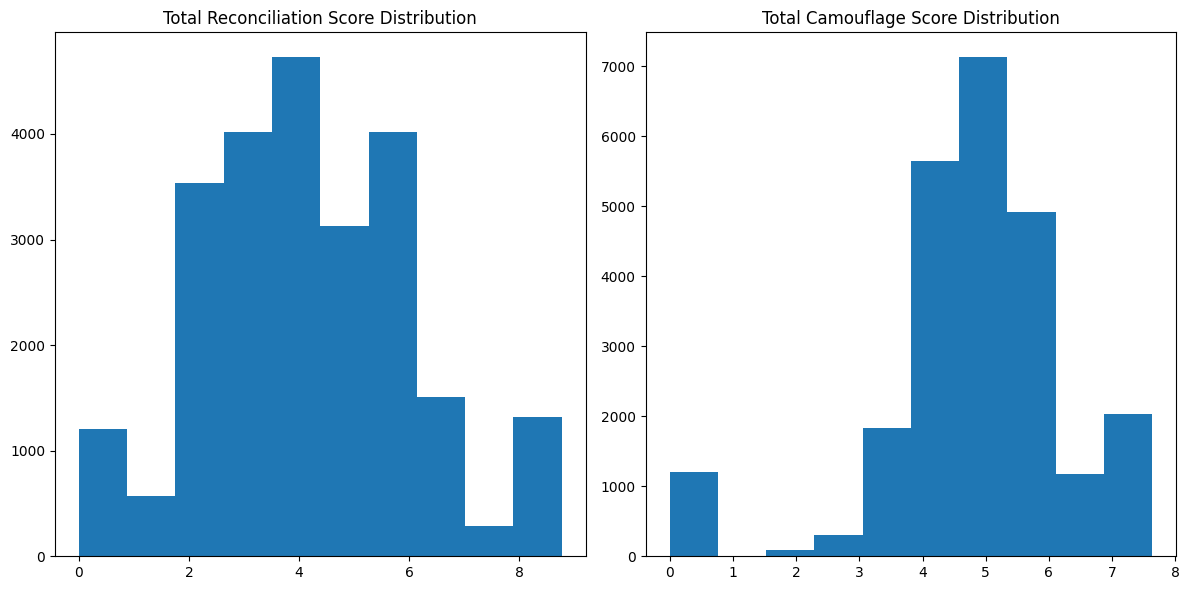

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(merged_df['total_reconciliation_score'])
axs[0].set_title("Total Reconciliation Score Distribution")

axs[1].hist(merged_df['total_camouflage_score'])
axs[1].set_title("Total Camouflage Score Distribution")

plt.tight_layout()
plt.show()